In [26]:
import pandas as pd

df = pd.read_csv("Sales_September_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [27]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11686 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          11646 non-null  object
 1   Product           11646 non-null  object
 2   Quantity Ordered  11646 non-null  object
 3   Price Each        11646 non-null  object
 4   Order Date        11646 non-null  object
 5   Purchase Address  11646 non-null  object
dtypes: object(6)
memory usage: 274.0+ KB


In [29]:
df.isnull().sum()

Order ID            40
Product             40
Quantity Ordered    40
Price Each          40
Order Date          40
Purchase Address    40
dtype: int64

In [30]:
df = df.dropna()

In [31]:
df = df[df["Order Date"] != "Order Date"]

In [32]:
df["Order Date"] = pd.to_datetime(
    df["Order Date"],
    format="%m/%d/%y %H:%M",
    errors="coerce"
)

In [33]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"], errors="coerce")
df["Price Each"] = pd.to_numeric(df["Price Each"], errors="coerce")

In [34]:
df = df.dropna(subset=["Order Date", "Quantity Ordered", "Price Each"])

In [35]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",11.95


In [36]:
df.describe()

,Quantity Ordered,Price Each,Order Date,Sales
count,11629.000000,11629.000000,11629,11629.000000
mean,1.128128,179.400007,2019-09-16 03:55:46.151861504,180.481271
min,1.000000,2.990000,2019-09-01 05:10:00,2.990000
25%,1.000000,11.950000,2019-09-08 18:06:00,11.950000
50%,1.000000,14.950000,2019-09-15 22:33:00,14.950000
75%,1.000000,150.000000,2019-09-23 15:52:00,150.000000
max,6.000000,1700.000000,2019-10-01 04:06:00,1700.000000
std,0.435077,328.595042,NaN,328.540970


In [37]:
df.groupby("Product")["Quantity Ordered"].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        1927
AA Batteries (4-pack)         1773
USB-C Charging Cable          1594
Lightning Charging Cable      1433
Wired Headphones              1302
Apple Airpods Headphones       968
Bose SoundSport Headphones     830
27in FHD Monitor               482
iPhone                         398
27in 4K Gaming Monitor         382
34in Ultrawide Monitor         378
Google Phone                   342
Flatscreen TV                  294
Macbook Pro Laptop             288
20in Monitor                   277
ThinkPad Laptop                249
Vareebadd Phone                126
LG Washing Machine              46
LG Dryer                        30
Name: Quantity Ordered, dtype: int64

In [38]:
df.groupby("Product")["Sales"].sum().sort_values(ascending=False).head(10)


Product
Macbook Pro Laptop            489600.00
iPhone                        278600.00
ThinkPad Laptop               248997.51
Google Phone                  205200.00
27in 4K Gaming Monitor        148976.18
Apple Airpods Headphones      145200.00
34in Ultrawide Monitor        143636.22
Flatscreen TV                  88200.00
Bose SoundSport Headphones     82991.70
27in FHD Monitor               72295.18
Name: Sales, dtype: float64

In [39]:
daily_sales = df.groupby(df["Order Date"].dt.day)["Sales"].sum().sort_index()
daily_sales

Order Date
1     69169.96
2     72275.38
3     62071.29
4     71784.82
5     67834.51
6     70087.10
7     70665.44
8     64098.30
9     79465.82
10    74257.35
11    77830.23
12    74776.11
13    78224.28
14    79399.76
15    73422.21
16    57940.24
17    62443.57
18    76563.30
19    64202.46
20    63013.83
21    62876.26
22    47909.61
23    70232.03
24    66751.42
25    78245.17
26    79307.77
27    66331.18
28    72096.63
29    73285.42
30    72255.25
Name: Sales, dtype: float64

In [40]:
df[["Quantity Ordered", "Price Each", "Sales"]].corr()

,Quantity Ordered,Price Each,Sales
Quantity Ordered,1.000000,-0.153233,-0.144522
Price Each,-0.153233,1.000000,0.999454
Sales,-0.144522,0.999454,1.000000


In [41]:
import matplotlib.pyplot as plt

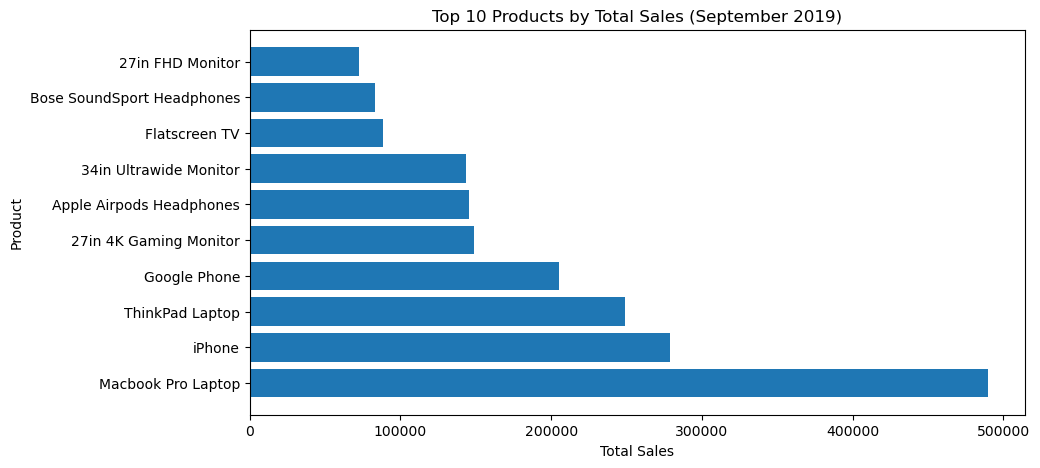

In [42]:
top10_sales = df.groupby("Product")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(top10_sales.index, top10_sales.values)
plt.title("Top 10 Products by Total Sales (September 2019)")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()

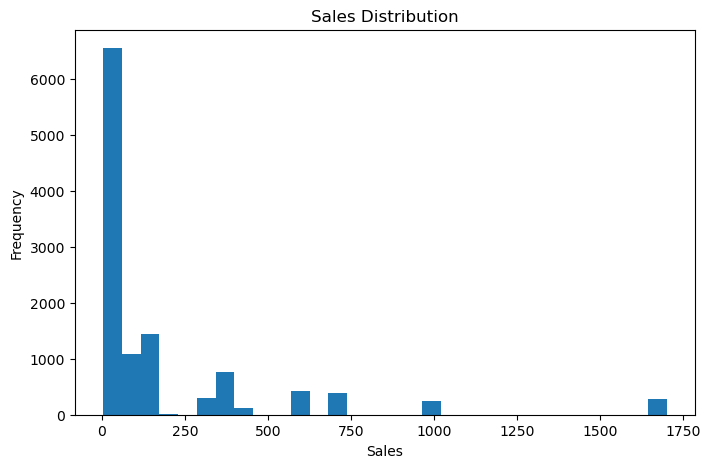

In [43]:
plt.figure(figsize=(8,5))
plt.hist(df["Sales"], bins=30)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

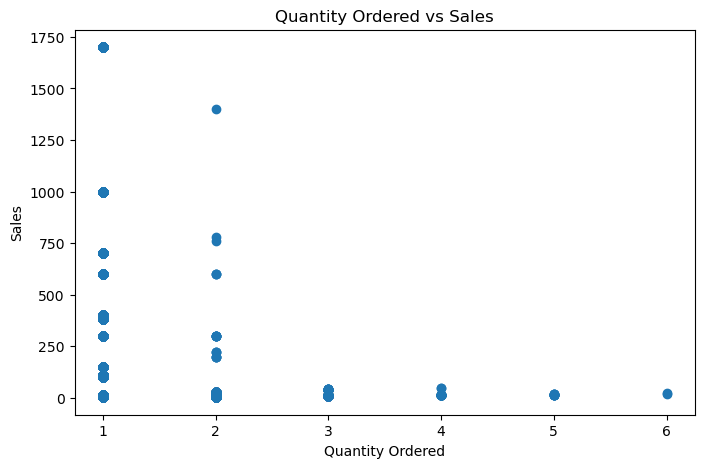

In [44]:
plt.figure(figsize=(8,5))
plt.scatter(df["Quantity Ordered"], df["Sales"])
plt.title("Quantity Ordered vs Sales")
plt.xlabel("Quantity Ordered")
plt.ylabel("Sales")
plt.show()

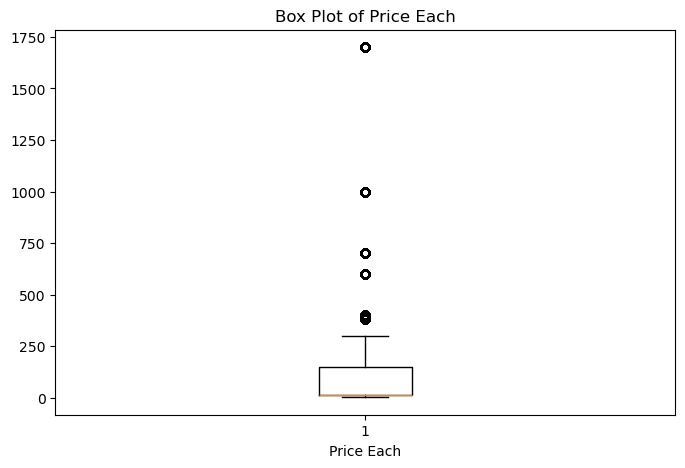

In [45]:
plt.figure(figsize=(8,5))
plt.boxplot(df["Price Each"])
plt.title("Box Plot of Price Each")
plt.xlabel("Price Each")
plt.show()

Insights and Interpretation

1. High-priced products such as Macbook Pro Laptop and iPhone generate the highest total sales revenue, despite being sold in lower quantities.

2. Low-priced accessories like batteries and charging cables are sold in large quantities but contribute less to total revenue.

3. The correlation analysis shows a very strong positive relationship between Price Each and Sales, as sales value depends heavily on product price.

4. Quantity Ordered has a weak negative correlation with Sales, indicating that higher sales value does not always result from higher quantities sold.

5. Daily sales fluctuate throughout the month, with certain days showing significantly higher sales than others.


Conclusion

This exploratory data analysis examined sales transactions for September 2019. The analysis highlighted key revenue-generating products, sales patterns, and relationships between quantity, price, and sales. The findings provide useful insights into customer purchasing behavior and product performance.